In [1]:
from neural_priors.utils.data import Subject, get_all_subject_ids
import seaborn as sns
import pandas as pd

In [2]:
subjects = get_all_subject_ids()

df = []
for subject in subjects:
    sub = Subject(subject)
    df.append(sub.get_behavioral_data(add_info=True))

df = pd.concat(df)

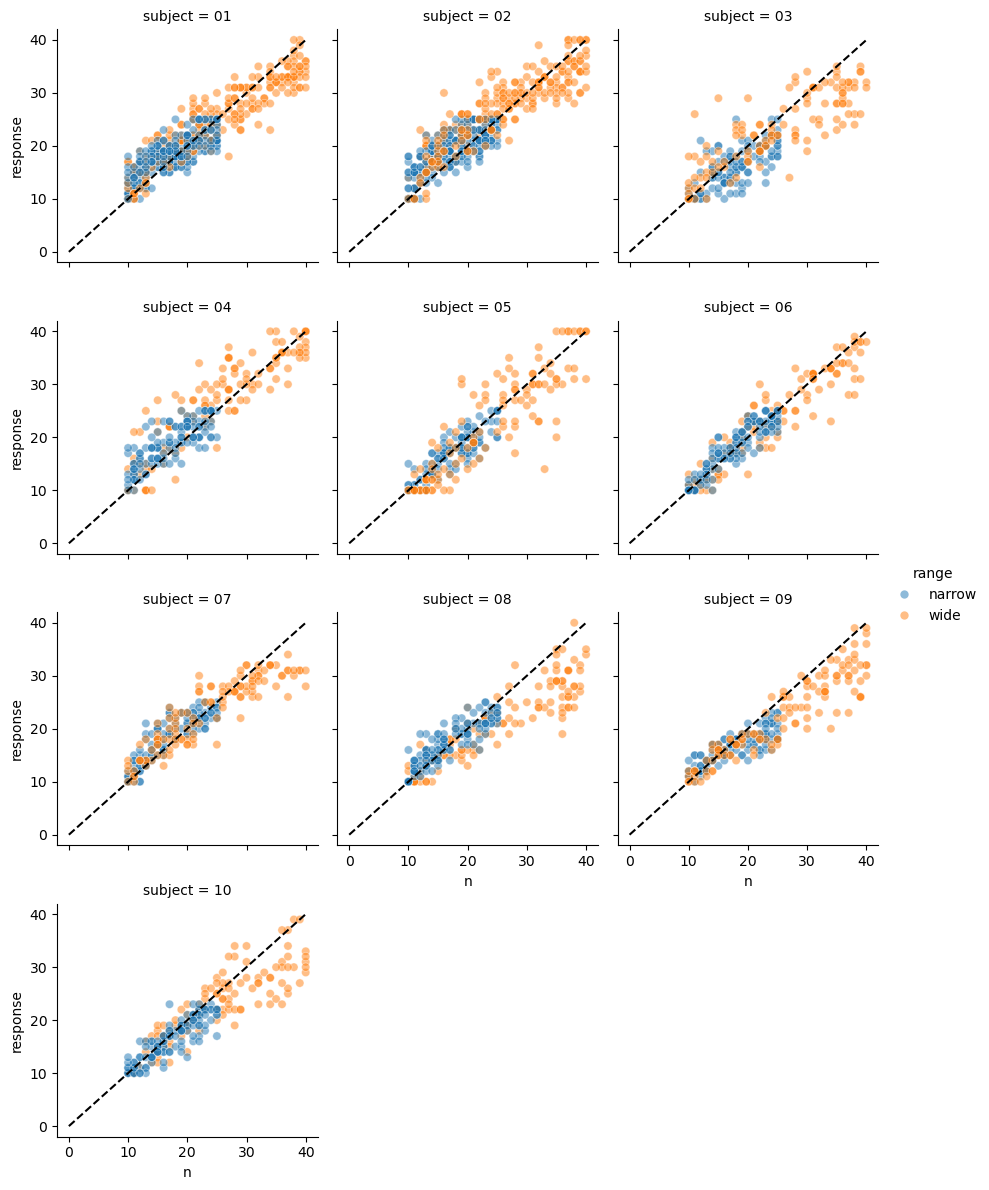

In [3]:
import matplotlib.pyplot as plt

g = sns.relplot(x='n', y='response', data=df.xs('estimation_task', 0, 'task').reset_index(), col='subject', hue='range', hue_order=['narrow', 'wide'], col_wrap=3, height=3., alpha=.5)

for ax in g.axes.ravel():
    ax.plot([0, 40], [0, 40], c='k', ls='--')

Text(0.5, 1.05, 'Bias')

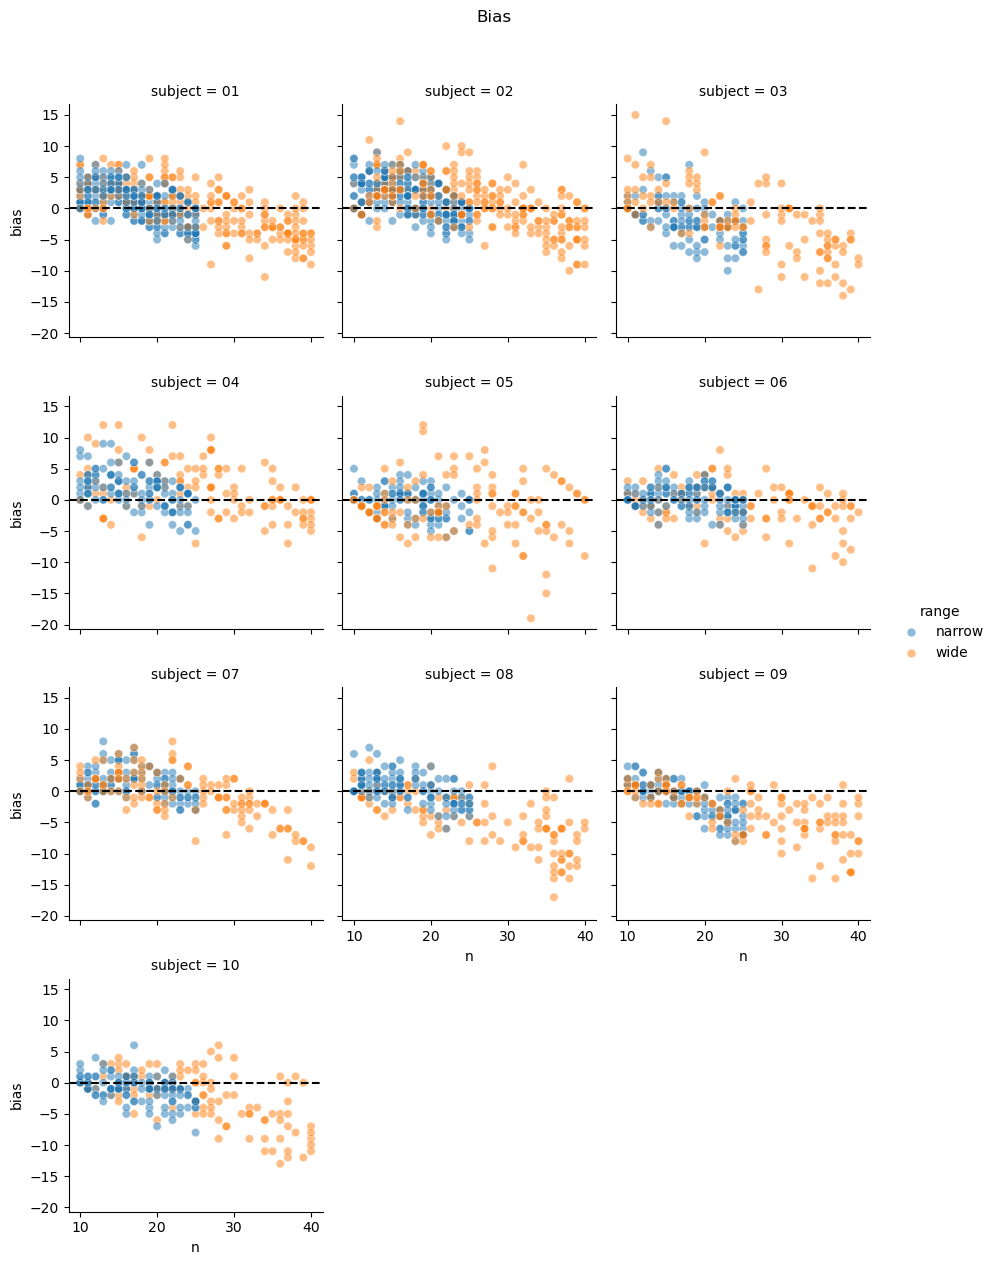

In [4]:
import matplotlib.pyplot as plt

df['bias'] = df['response'] - df['n']

g = sns.relplot(x='n', y='bias', data=df.xs('estimation_task', 0, 'task').reset_index(), col='subject', hue='range', hue_order=['narrow', 'wide'], col_wrap=3, height=3., alpha=.5)
g.map(plt.axhline, y=0, ls='--', c='k')
g.fig.suptitle('Bias', y=1.05)

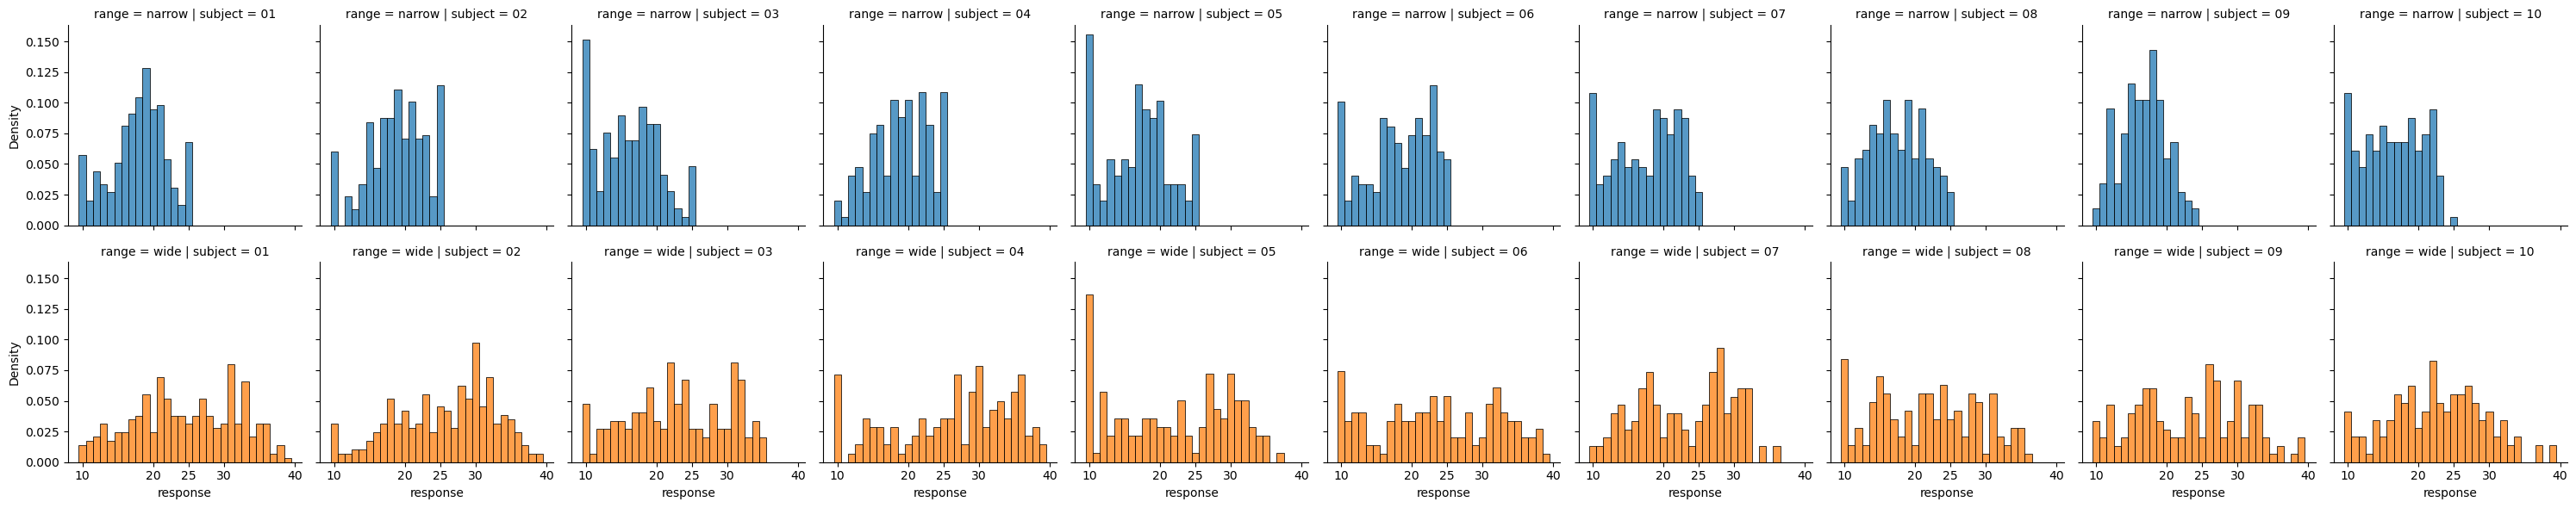

In [5]:
import numpy as np
g = sns.FacetGrid(df.reset_index(), row='range', hue='range', col='subject')

g.map(sns.histplot, 'response', bins=np.arange(9.5, 40.5, 1), stat='density')

g.set(xticks=[10, 20, 25, 30, 40])

Text(0.5, 0.98, 'Average bias (rolling mean, window=5)')

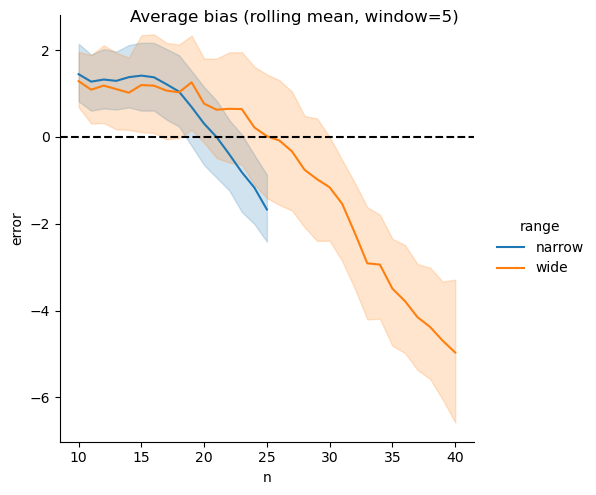

In [6]:
tmp = df.xs('estimation_task', 0, 'task').groupby(['subject', 'range', 'n'])['error'].mean().groupby(['subject', 'range']).apply(lambda d: d.rolling(5, min_periods=1).mean().droplevel([0,1]))

g = sns.relplot(x='n', y='error', hue='range', data=tmp.reset_index(), kind='line')

g.map(plt.axhline, y=0, ls='--', c='k')

g.fig.suptitle('Average bias (rolling mean, window=5)')

Text(0.5, 0.98, 'Average bias (rolling mean, window=5)')

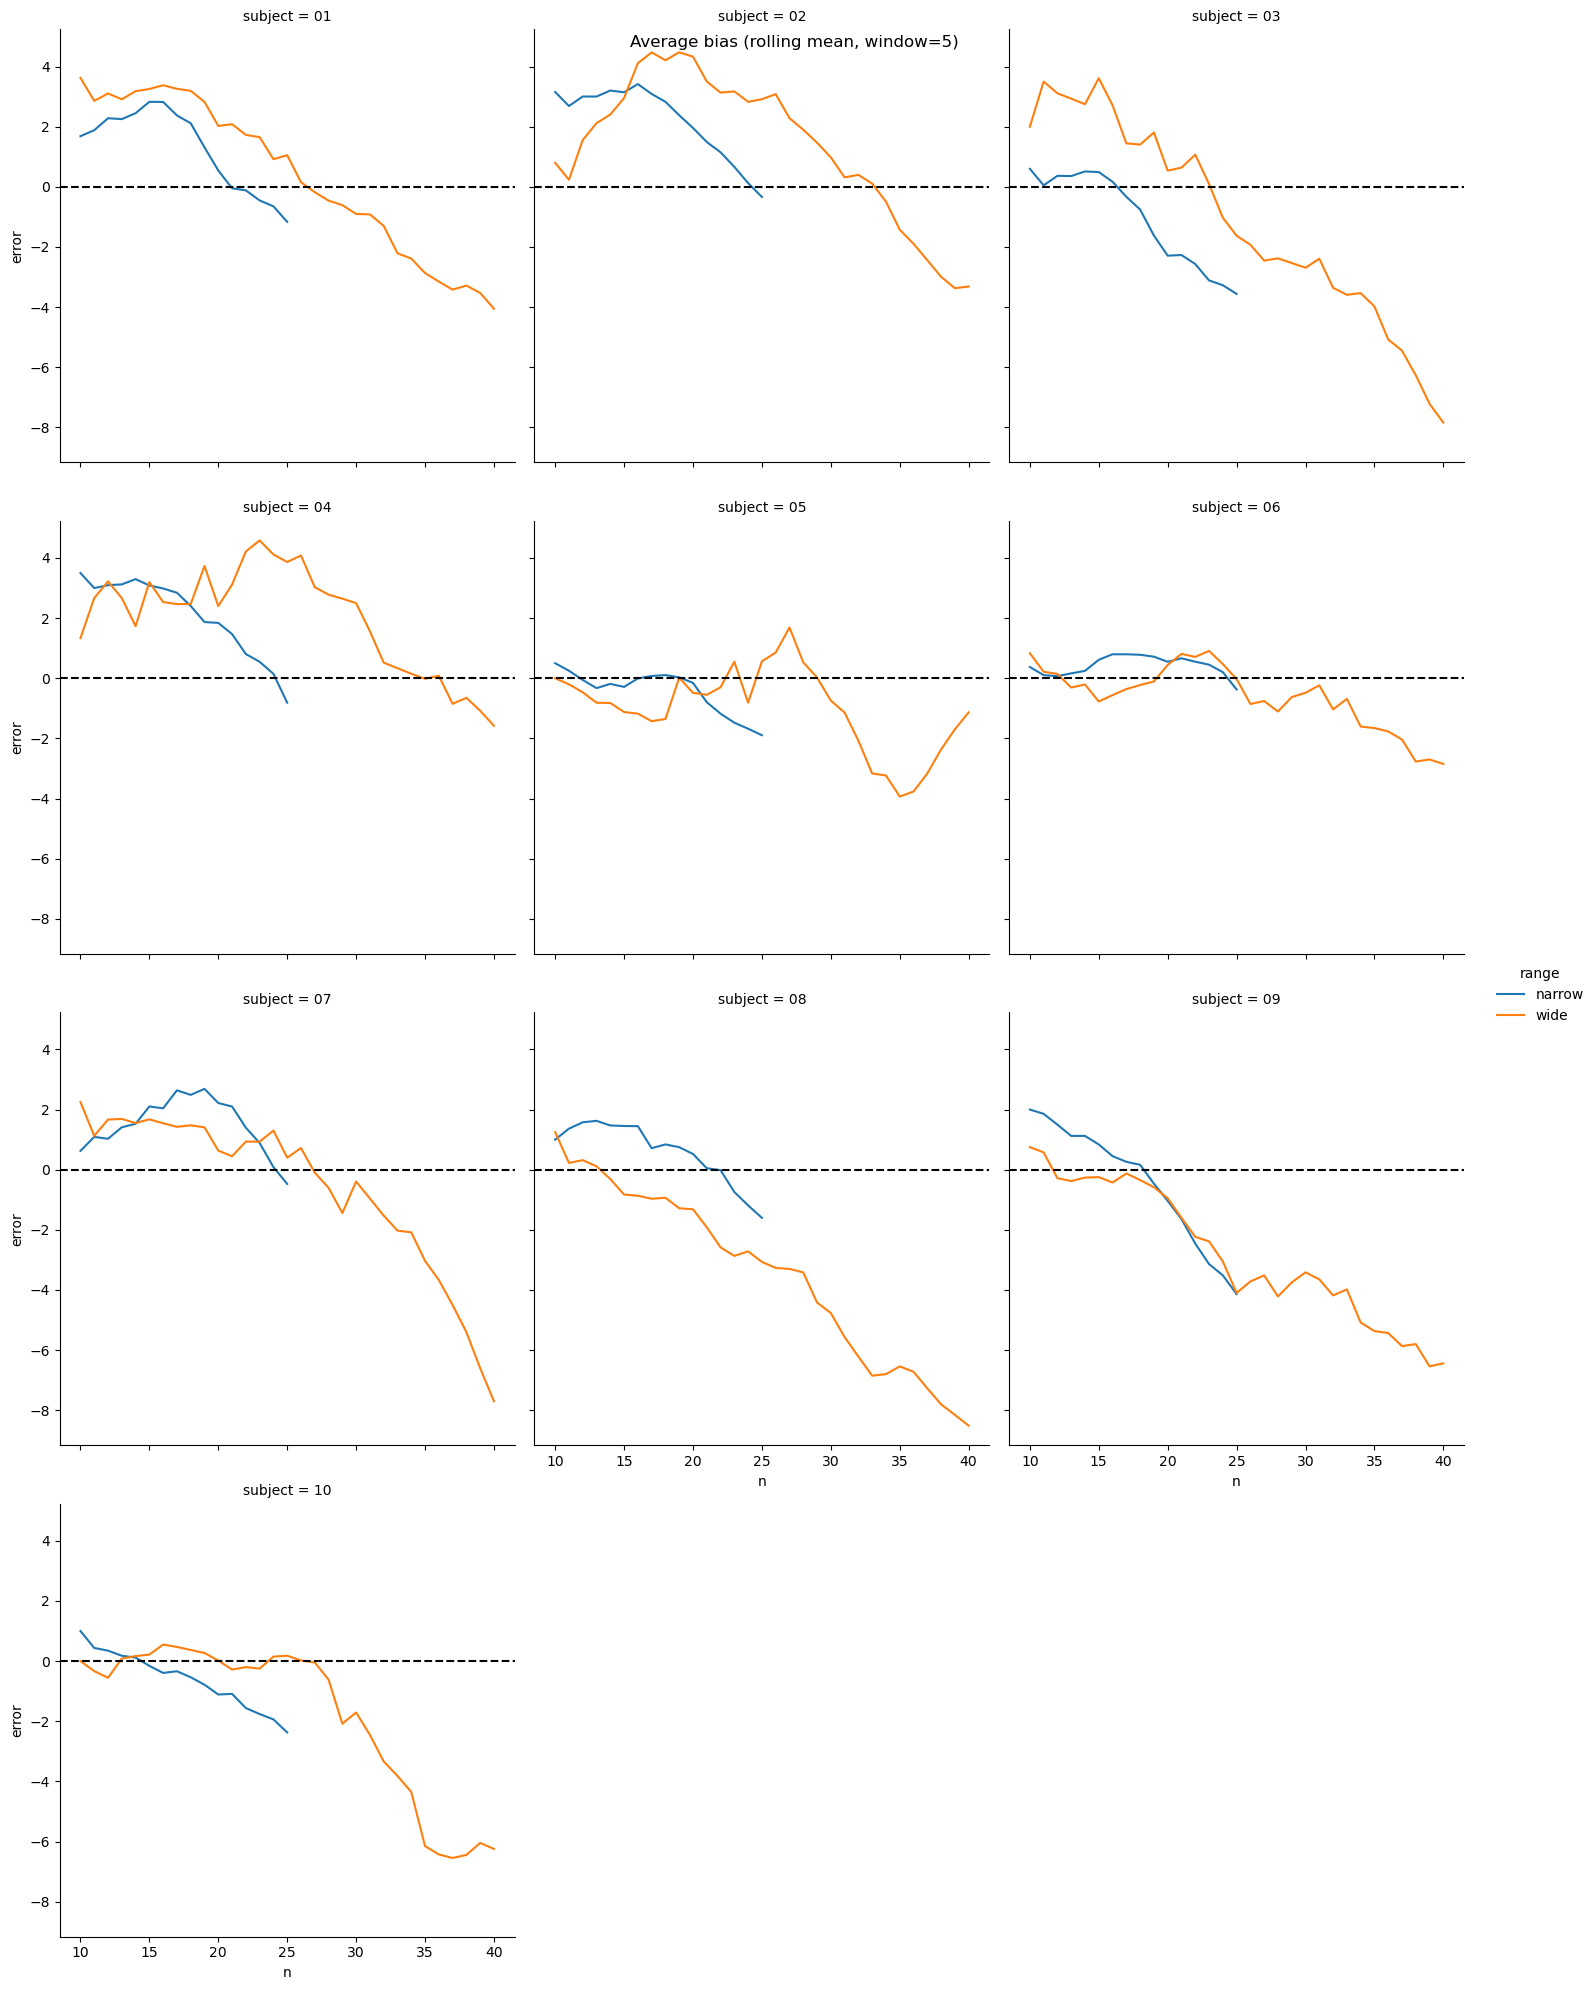

In [7]:
tmp = df.xs('estimation_task', 0, 'task').groupby(['subject', 'range', 'n'])['error'].mean().groupby(['subject', 'range']).apply(lambda d: d.rolling(5, min_periods=1).mean().droplevel([0,1]))

g = sns.relplot(x='n', y='error', hue='range', col='subject', col_wrap=3, data=tmp.reset_index(), kind='line')

g.map(plt.axhline, y=0, ls='--', c='k')

g.fig.suptitle('Average bias (rolling mean, window=5)')

In [9]:
rolling_window = 5

Text(0.5, 1.05, 'Standard deviation of responses (rolling mean, window=5)')

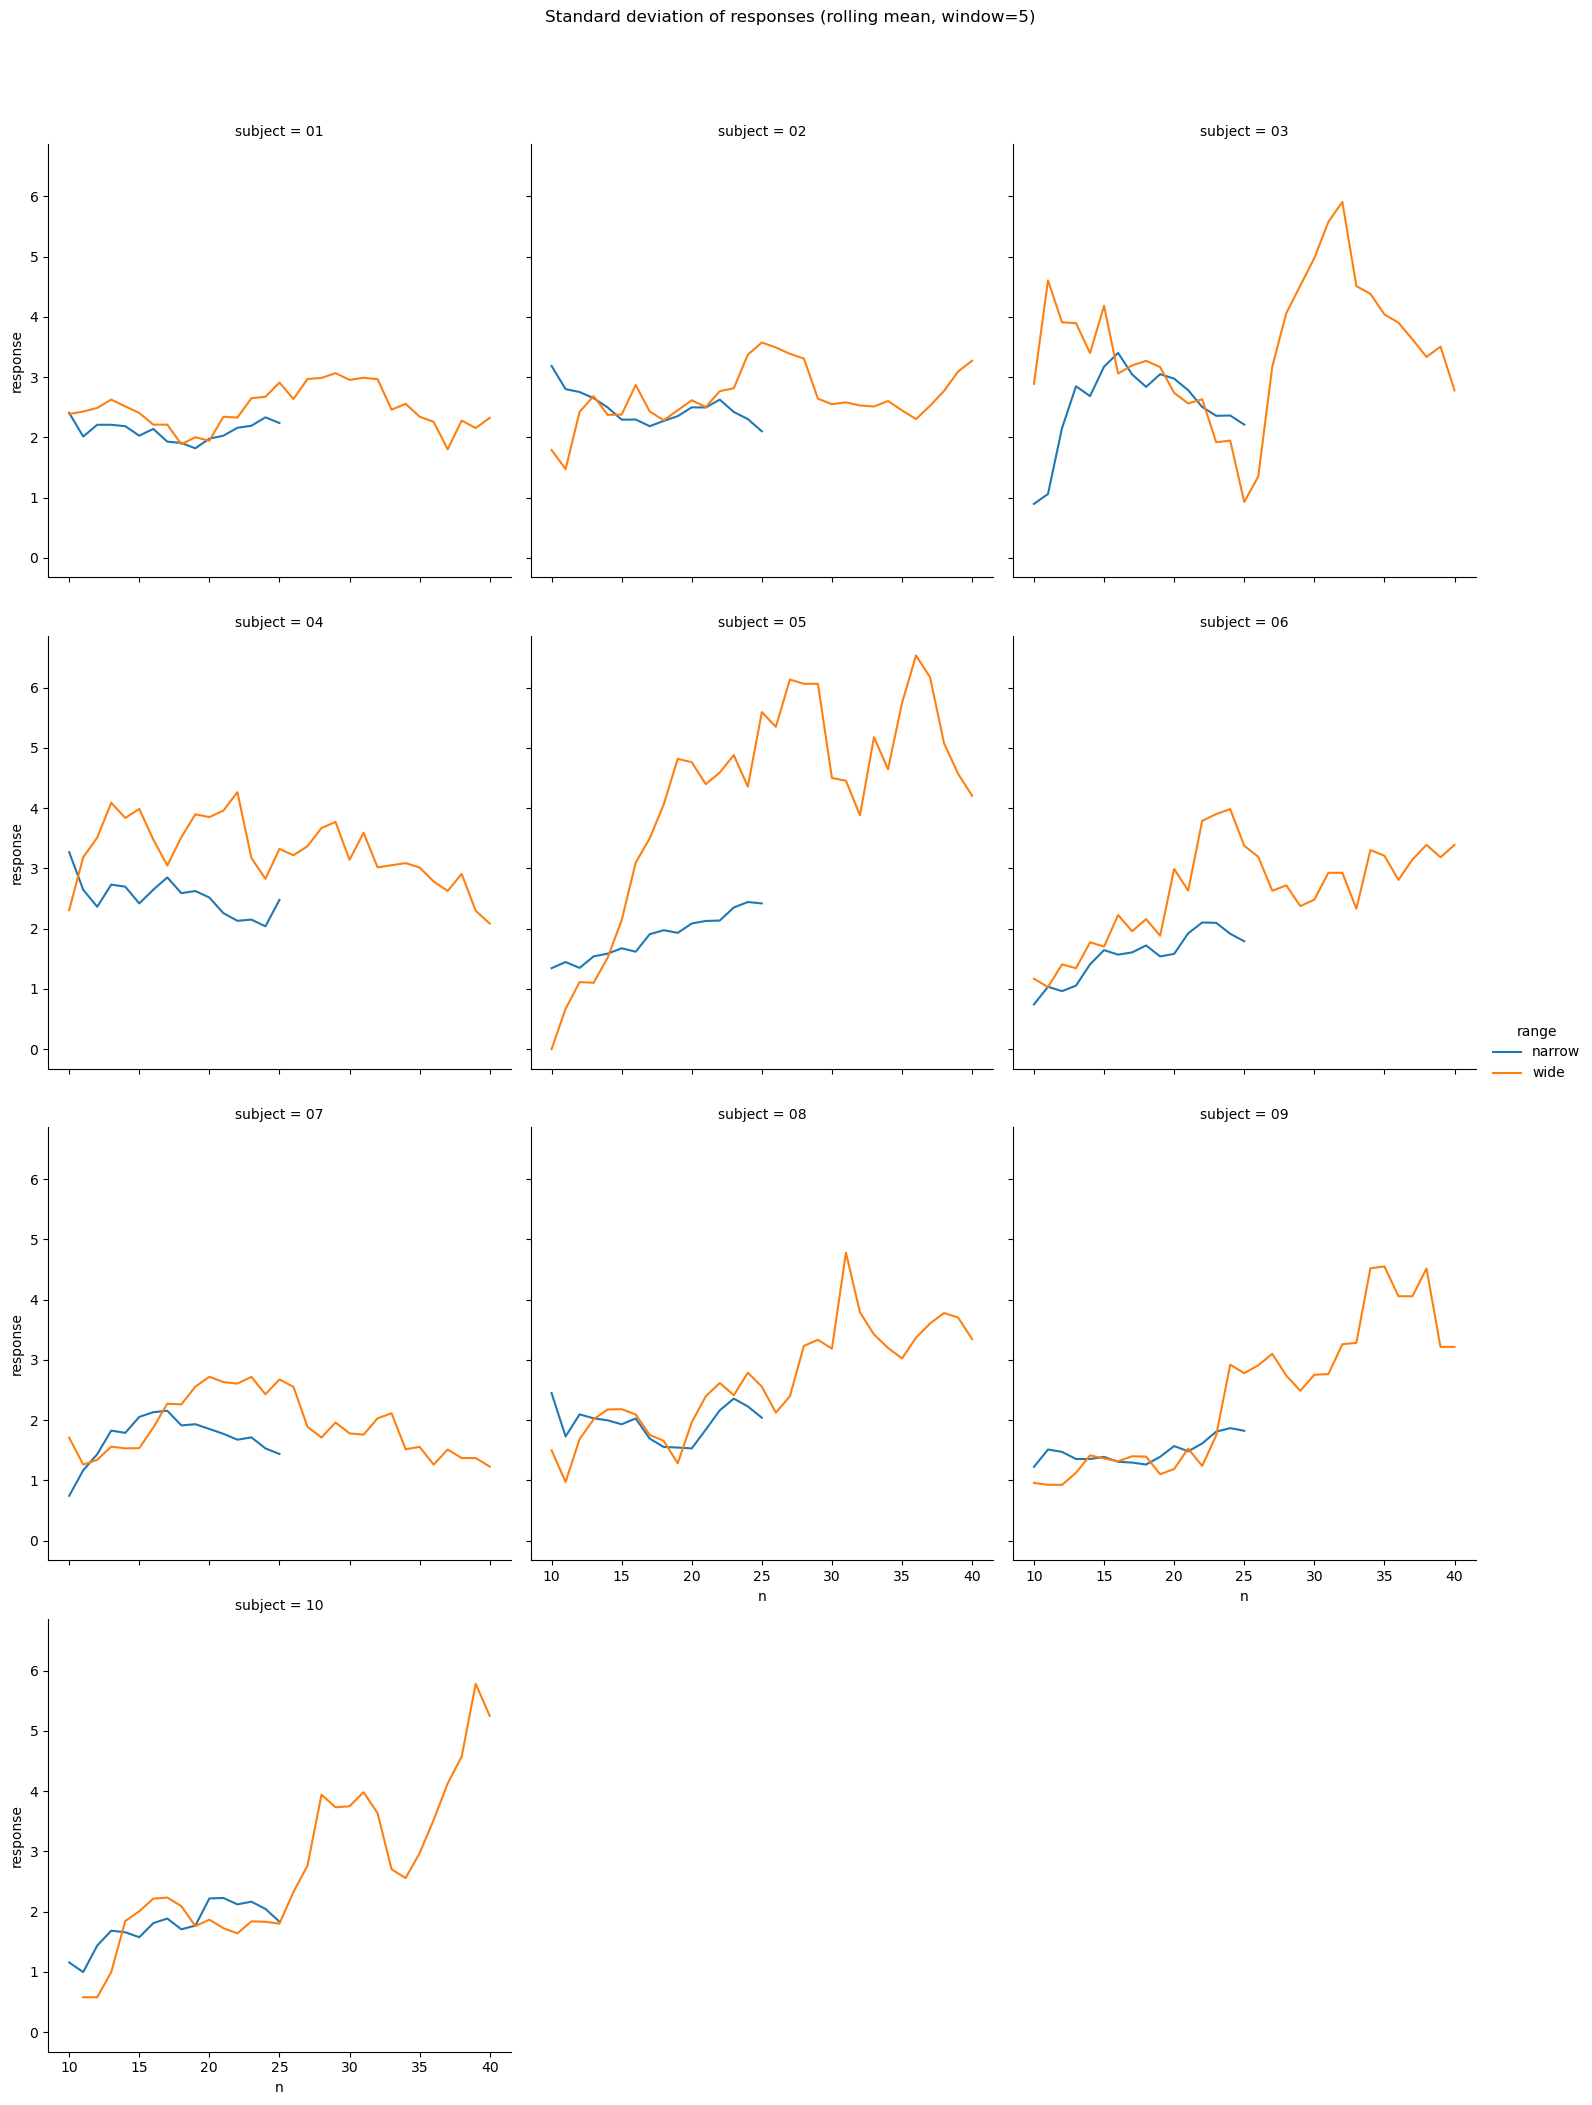

In [10]:
df_std = df.xs('estimation_task', 0, 'task').groupby(['subject', 'range', 'n'], as_index=True)['response'].std().groupby(['subject', 'range']).apply(lambda d: d.rolling(rolling_window, min_periods=1).mean().droplevel([0, 1]))


g = sns.relplot(x='n', y='response', hue='range', data=df_std.to_frame().reset_index(), col='subject', col_wrap=3, kind='line')
g.fig.suptitle('Standard deviation of responses (rolling mean, window=5)', y=1.05)

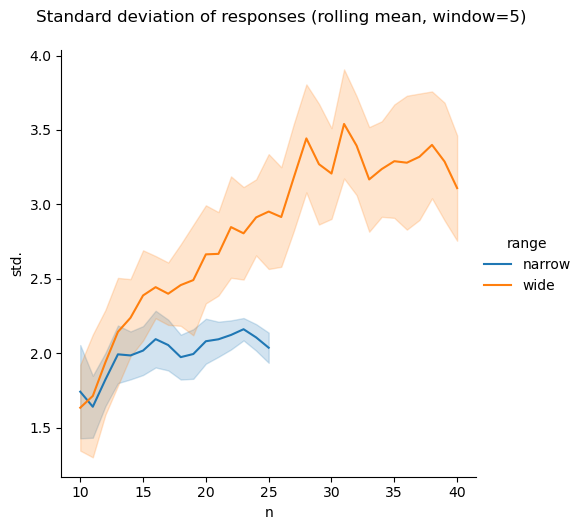

In [11]:
rolling_window = 10
# .apply(lambda d: d['bias'].rolling(rolling_window).mean()).to_frame().droplevel([2, 3])


g = sns.relplot(x='n', y='response', hue='range', data=df_std.reset_index(), kind='line', errorbar='se')

# g.set_titles('Standard deviation of responses')
g.fig.suptitle('Standard deviation of responses (rolling mean, window=5)', y=1.05)
g.set_ylabels('std.')

Text(0.5, 0.98, 'Average Absolute Error (rolling mean, window=5)')

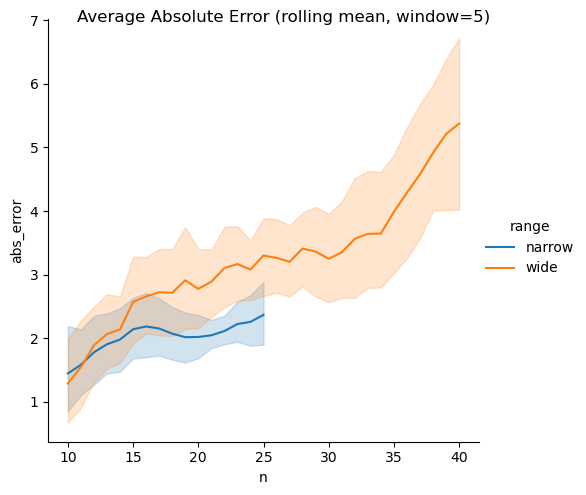

In [12]:
tmp = df.xs('estimation_task', level='task').groupby(['subject', 'range', 'n'])['abs_error'].mean().groupby(['subject', 'range']).apply(lambda d: d.rolling(5, min_periods=1).mean().droplevel([0,1]))

g = sns.relplot(x='n', y='abs_error', hue='range', data=tmp.reset_index(), kind='line')
g.fig.suptitle('Average Absolute Error (rolling mean, window=5)')


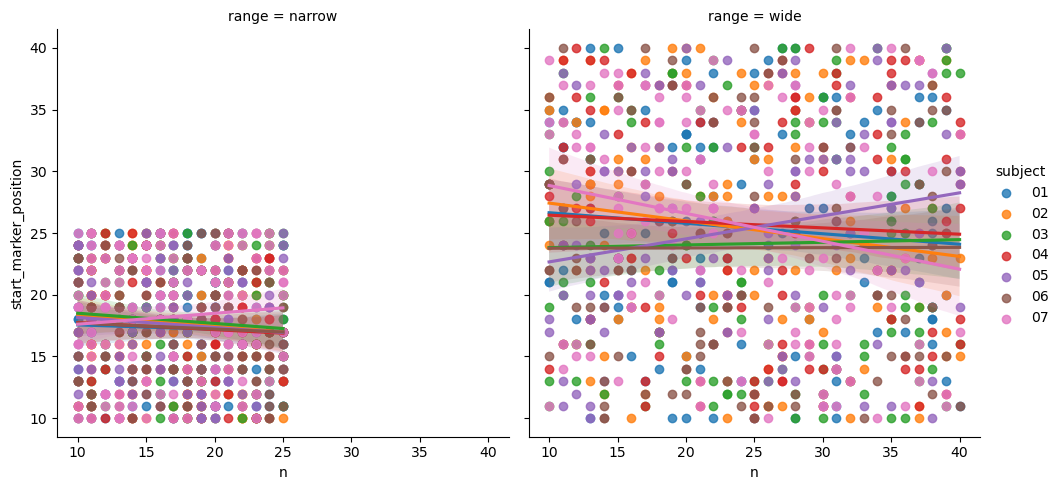

In [13]:
sns.lmplot(x='n', y='start_marker_position', data=df.reset_index(), hue='subject', col='range')

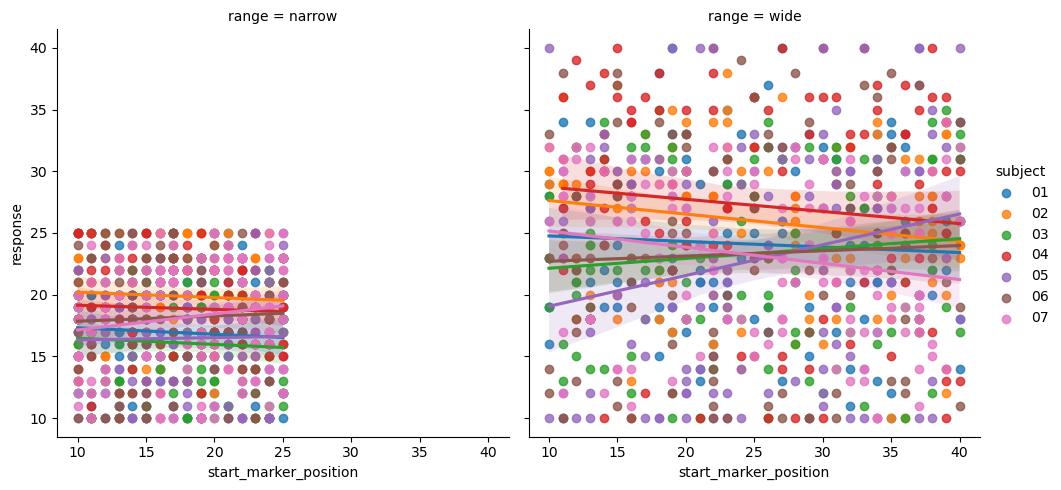

In [14]:
sns.lmplot(x='start_marker_position', y='response', data=df.reset_index(), hue='subject', col='range')

In [15]:
df['marker_moved'] = (df['response'] - df['start_marker_position']).abs()

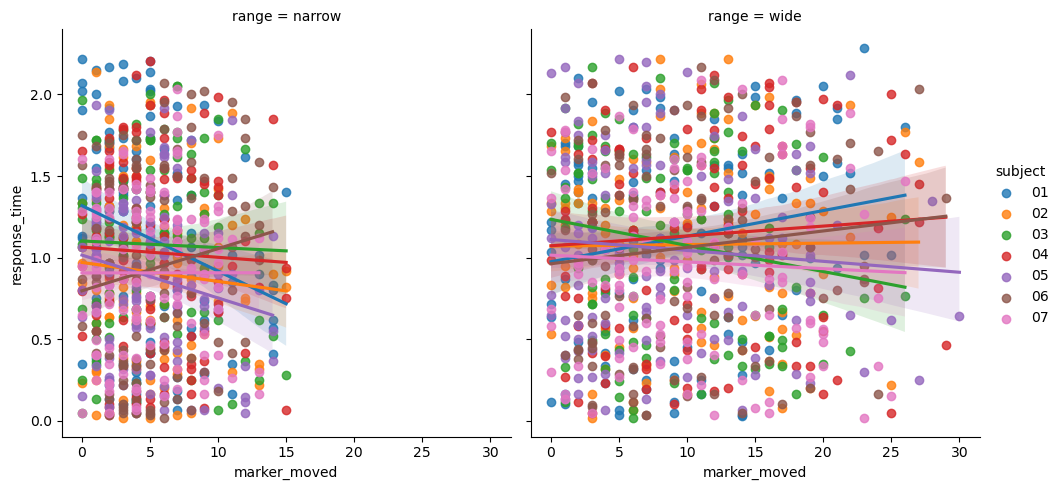

In [16]:
sns.lmplot(x='marker_moved', y='response_time', data=df.reset_index(), hue='subject', col='range')

In [17]:
df.to_csv('/data/ds-neuralpriors/sourcedata/behavior_pilots.tsv', sep='\t')

In [18]:
no_response_penalty = 0.1
max_reward = 0.07
reward_slope = 1./600.

In [19]:
def get_score(d, include_no_response_penalty=True):

    squared_error = d['error']**2
    reward = max_reward - reward_slope * squared_error

    reward = reward.sum()

    if include_no_response_penalty:
        reward -= no_response_penalty * d.response.isnull().sum()

    return reward

In [20]:
df.groupby(['subject', 'task', 'range']).apply(get_score, include_no_response_penalty=True)

subject  task             range 
01       estimation_task  narrow    6.816667
                          wide      4.830000
         feedback         narrow    1.685000
                          wide      1.528333
02       estimation_task  narrow    5.491667
                          wide      3.953333
         feedback         narrow    1.591667
                          wide      1.310000
03       estimation_task  narrow    4.870000
                          wide      1.740000
         feedback         narrow    1.060000
                          wide      1.571667
04       estimation_task  narrow    5.868333
                          wide      3.805000
         feedback         narrow    1.710000
                          wide      0.828333
05       estimation_task  narrow    7.146667
                          wide      3.525000
         feedback         narrow    1.626667
                          wide      0.113333
06       estimation_task  narrow    7.520000
                      

In [21]:
df.groupby(['subject']).apply(get_score, include_no_response_penalty=True)

subject
01    14.860000
02    12.346667
03     9.241667
04    12.211667
05    12.411667
06    16.565000
07    15.233333
dtype: float64

In [22]:
df['bias'] = df['response'] - df['n']

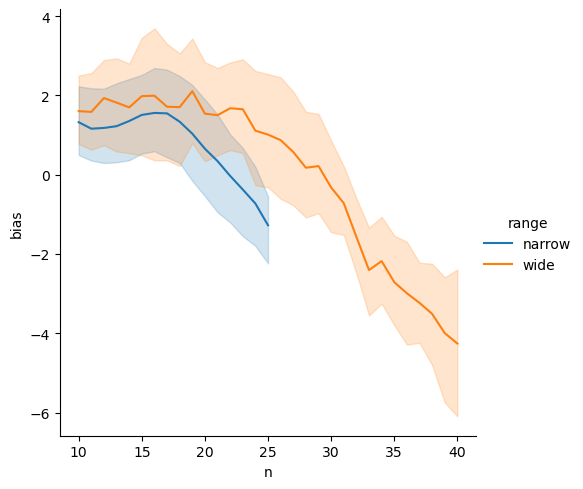

In [23]:
rolling_window = 5
bias = df.xs('estimation_task', 0, 'task').groupby(['subject', 'range', 'n'], as_index=True)['bias'].mean().groupby(['subject', 'range']).apply(lambda d: d.rolling(5, min_periods=1).mean().droplevel([0, 1]))
# .apply(lambda d: d['bias'].rolling(rolling_window).mean()).to_frame().droplevel([2, 3])


sns.relplot(x='n', y='bias', hue='range', data=bias.reset_index(), kind='line')

In [24]:
df.xs('estimation_task', 0, 'task').groupby(['subject', 'range', 'n'], as_index=True)['response'].std().isnull().any()

True

Text(0.5, 0.98, 'Standard deviation of responses')

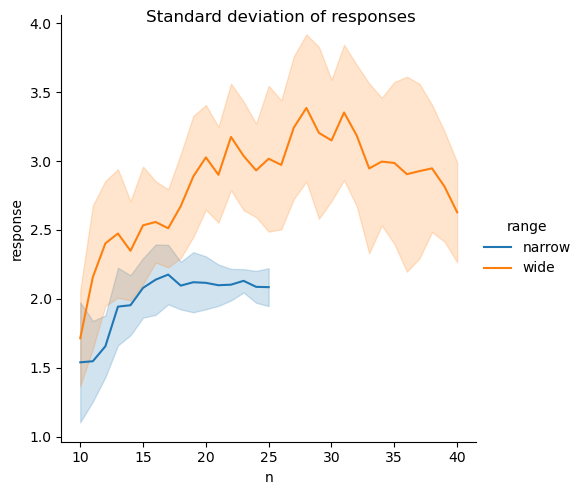

In [25]:
rolling_window = 5
df_std = df.xs('estimation_task', 0, 'task').groupby(['subject', 'range', 'n'], as_index=True)['response'].std().groupby(['subject', 'range']).apply(lambda d: d.rolling(rolling_window, min_periods=1).mean().droplevel([0, 1]))
# .apply(lambda d: d['bias'].rolling(rolling_window).mean()).to_frame().droplevel([2, 3])


g = sns.relplot(x='n', y='response', hue='range', data=df_std.reset_index(), kind='line', errorbar='se')

# g.set_titles('Standard deviation of responses')
g.fig.suptitle('Standard deviation of responses')

In [30]:
df

trial_nr       onset  phase  response  \
subject task            run                                              
01      feedback        1   8           1   32.918250      4      16.0   
                            13          2   56.423359      4      12.0   
                            18          3   64.030371      4      16.0   
                            23          4   75.174033      4      10.0   
                            28          5   81.713419      4      10.0   
...                                   ...         ...    ...       ...   
07      estimation_task 8   302        26  287.627790      5      14.0   
                            313        27  295.618429      5      18.0   
                            324        28  306.028260      5      32.0   
                            335        29  314.202378      5      17.0   
                            346        30  323.127378      5      24.0   

                                 nr_frames     n   onset_abs  duration  \
subject task            run                                              
01      feedback        1   8         30.0  19.0   36.961872  0.500520   
                            13        30.0  12.0   60.466981  0.500385   
                            18        30.0  16.0   68.073993  0.500491   
                            23        31.0  13.0   79.217655  0.517141   
                            28        30.0  10.0   85.757042  0.500500   
...                                    ...   ...         ...       ...   
07      estimation_task 8   302       30.0  12.0  293.048471  0.500458   
                            313       31.0  16.0  301.039109  0.517135   
                            324       31.0  34.0  311.448941  0.517193   
                            335       28.0  15.0  319.623059  0.498040   
                            346       30.0  17.0  328.548058  0.500468   

                                  range  jitter  start_marker_position  \
subject task            run                                              
01      feedback        1   8    narrow     NaN                    NaN   
                            13   narrow     NaN                    NaN   
                            18   narrow     NaN                    NaN   
                            23   narrow     NaN                    NaN   
                            28   narrow     NaN                    NaN   
...                                 ...     ...                    ...   
07      estimation_task 8   302    wide     4.0                   15.0   
                            313    wide     4.0                   20.0   
                            324    wide     5.0                   10.0   
                            335    wide     4.0                   25.0   
                            346    wide     4.0                   29.0   

                                 response_time  error  abs_error  \
subject task            run                                        
01      feedback        1   8              NaN   -3.0        3.0   
                            13             NaN    0.0        0.0   
                            18             NaN    0.0        0.0   
                            23             NaN   -3.0        3.0   
                            28             NaN    0.0        0.0   
...                                        ...    ...        ...   
07      estimation_task 8   302       1.534817    2.0        2.0   
                            313       0.333730    2.0        2.0   
                            324       1.551734   -2.0        2.0   
                            335       0.533698    2.0        2.0   
                            346       0.266921    7.0        7.0   

                                 squared_error  bias  marker_moved  
subject task            run                                         
01      feedback        1   8              9.0  -3.0           NaN  
                            13             0.0   0.0

In [31]:
df['previous_response'] = df.groupby(['subject', 'task', 'run'])['response'].shift(1)

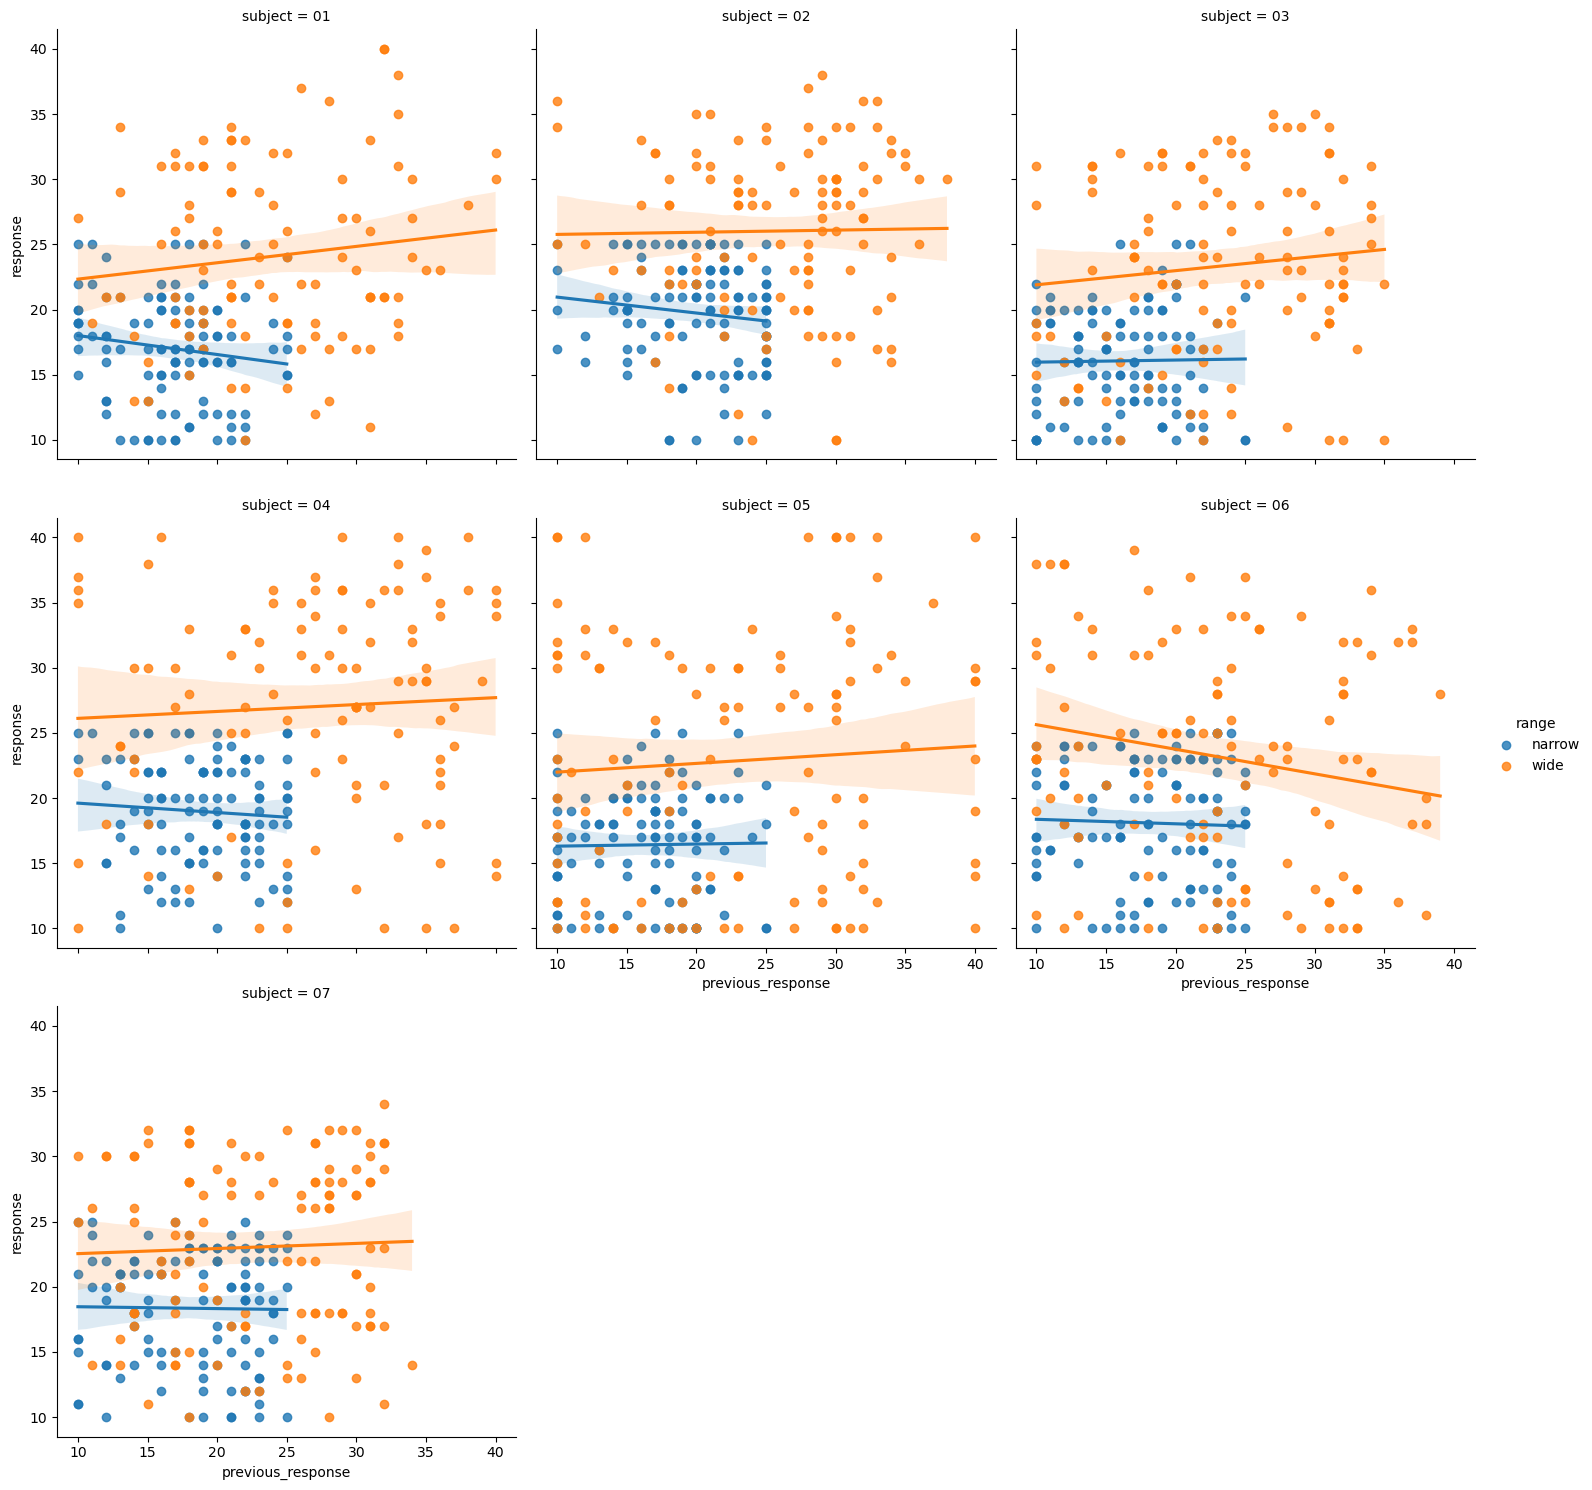

In [37]:
sns.lmplot(x='previous_response', y='response', hue='range', col='subject', col_wrap=3,
           data=df.xs('estimation_task', 0, 'task').reset_index())

In [39]:
import pingouin
df.xs('estimation_task', 0, 'task').groupby(['subject', 'range']).apply(lambda d: pingouin.corr(d['previous_response'], d['response']))

n         r          CI95%     p-val   BF10  \
subject range                                                           
01      narrow pearson  109 -0.141604  [-0.32, 0.05]  0.141899  0.347   
        wide   pearson  105  0.126348  [-0.07, 0.31]  0.199022  0.275   
02      narrow pearson  112 -0.122869   [-0.3, 0.06]  0.196831  0.269   
        wide   pearson  114  0.016452   [-0.17, 0.2]  0.862072  0.119   
03      narrow pearson  106  0.015701  [-0.18, 0.21]  0.873085  0.123   
        wide   pearson  114  0.108011  [-0.08, 0.29]  0.252673  0.223   
04      narrow pearson  110 -0.071348  [-0.26, 0.12]  0.458878  0.156   
        wide   pearson  108  0.053671  [-0.14, 0.24]  0.581171   0.14   
05      narrow pearson  112  0.015698   [-0.17, 0.2]  0.869513   0.12   
        wide   pearson  114  0.065821  [-0.12, 0.25]  0.486565  0.149   
06      narrow pearson  114 -0.033984  [-0.22, 0.15]  0.719628  0.125   
        wide   pearson  114 -0.187456  [-0.36, -0.0]  0.045807  0.839   
07      narrow pearson  113 -0.014623   [-0.2, 0.17]  0.877829  0.119   
        wide   pearson  116  0.039175  [-0.14, 0.22]  0.676300  0.127   

                           power  
subject range                     
01      narrow pearson  0.313531  
        wide   pearson  0.251300  
02      narrow pearson  0.253239  
        wide   pearson  0.053334  
03      narrow pearson  0.052786  
        wide   pearson  0.208847  
04      narrow pearson  0.114937  
        wide   pearson  0.085505  
05      narrow pearson  0.052963  
        wide   pearson  0.107104  
06      narrow pearson  0.064790  
        wide   pearson  0.518453  
07      narrow pearson  0.052578  
        wide   pearson  0.070120

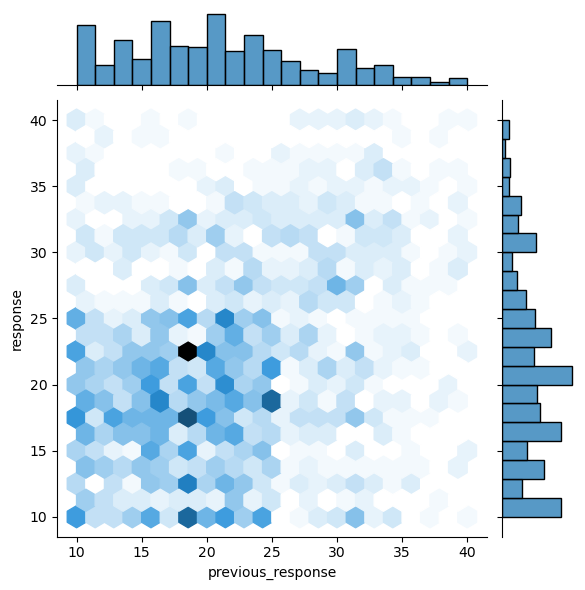

In [36]:
sns.jointplot(x='previous_response', y='response', data=df.reset_index(), kind='hex', col='')